In [17]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [19]:
#Build the CNN Model 
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout

In [20]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2) 
test_gen = ImageDataGenerator(rescale=(1./255))

In [21]:
#passing a value using another variables
train = train_gen.flow_from_directory('Dataset(original)/Train',
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      batch_size=8)

test = test_gen.flow_from_directory('Dataset(original)/test',
                                    target_size=(224,224),
                                    class_mode='categorical',
                                    batch_size=8)

Found 655 images belonging to 17 classes.
Found 183 images belonging to 17 classes.


In [23]:
# Load the pre-trained DenseNet121 model without the top/fully-connected layers
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [34]:
'''# Set DenseNet121 layers as non-trainable
for layer in densenet.layers:
    layer.trainable = False

x = densenet.output
x = GlobalAveragePooling2D()(x)

# Build the combined model
cm_DN_CNN = Dense(40, activation='relu')(x)
cm_DN_CNN = Dense(80, activation='relu')(x)
cm_DN_CNN = Dense(160, activation='relu')(x)
cm_DN_CNN = Dense(80, activation='relu')(x)
cm_DN_CNN = Dense(18, activation='softmax')(x)'''

In [24]:
# Set DenseNet121 layers as non-trainable
for layer in densenet.layers:
    layer.trainable = False

x = densenet.output

x = Convolution2D(50, (3, 3), activation='relu', padding='same')(x)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)

# Build the combined model
output = Dense(80, activation='relu')(x)
output = Dense(160, activation='relu')(output)
output = Dense(320, activation='relu')(output)
output = Dense(160, activation='relu')(output)
output = Dense(17, activation='softmax')(output)

In [25]:
model = Model(inputs=densenet.input,outputs = output)

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [27]:
history = model.fit(train,validation_data=test,epochs=40,
                    steps_per_epoch=len(train),
                    validation_steps = len(test))

Epoch 1/40
82/82 [==============================] - 50s 546ms/step - loss: 2.8610 - accuracy: 0.0733 - val_loss: 2.8210 - val_accuracy: 0.1366
Epoch 2/40
82/82 [==============================] - 42s 511ms/step - loss: 2.7046 - accuracy: 0.1389 - val_loss: 2.6131 - val_accuracy: 0.1421
Epoch 3/40
82/82 [==============================] - 41s 498ms/step - loss: 2.5158 - accuracy: 0.2061 - val_loss: 2.2704 - val_accuracy: 0.2842
Epoch 4/40
82/82 [==============================] - 41s 496ms/step - loss: 2.2502 - accuracy: 0.2718 - val_loss: 2.0319 - val_accuracy: 0.3443
Epoch 5/40
82/82 [==============================] - 41s 494ms/step - loss: 2.0338 - accuracy: 0.3573 - val_loss: 2.1329 - val_accuracy: 0.3169
Epoch 6/40
82/82 [==============================] - 41s 504ms/step - loss: 1.8598 - accuracy: 0.3893 - val_loss: 1.4261 - val_accuracy: 0.5519
Epoch 7/40
82/82 [==============================] - 41s 502ms/step - loss: 1.6194 - accuracy: 0.4687 - val_loss: 1.3745 - val_accuracy: 0.4809

In [28]:
# Save the trained model
model.save('DenseNet121.h5')

In [29]:
train.class_indices

{'Darier_s disease': 0,
 'Muehrck-e_s lines': 1,
 'aloperia areata': 2,
 'beau_s lines': 3,
 'bluish nail': 4,
 'clubbing': 5,
 'eczema': 6,
 'half and half nailes (Lindsay_s nails)': 7,
 'koilonychia': 8,
 'leukonychia': 9,
 'onycholycis': 10,
 'pale nail': 11,
 'red lunula': 12,
 'splinter hemmorrage': 13,
 'terry_s nail': 14,
 'white nail': 15,
 'yellow nails': 16}

In [14]:
#Testing
import numpy as np
from tensorflow.keras.preprocessing import image

In [15]:
img=image.load_img('Dataset(original)/train/bluish nail/1.PNG',target_size=(224,224))

In [16]:
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
model.predict(img)
pred = np.argmax(model.predict(img))
output = ['Darier_s disease','Muehrck-e_s lines','Onychogryphosis','Onycholycis_NailPsoriasis',
          'aloperia areata','beau_s lines','bluish nail', 'clubbing','eczema','half and half nailes (Lindsay_s nails)',
          'koilonychia','leukonychia','pale nail','red lunula',
          'splinter hemmorrage_Acral Lentiginous Melanoma',
          'terry_s nail_WhiteNails','yellow nails']
print(output[pred])

1/1 [==============================] - 0s 75ms/step
terry_s nail_WhiteNails


In [30]:
import matplotlib.pyplot as plt

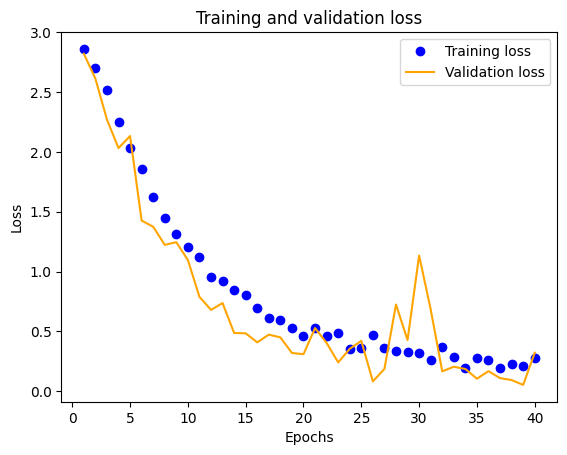

In [31]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()